In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('../Dataset/UpdatedResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [104]:
resumeDataSet.drop_duplicates(subset="Resume", keep='first', inplace=True)

In [105]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 898
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        166 non-null    object
 1   Resume          166 non-null    object
 2   cleaned_resume  166 non-null    object
dtypes: object(3)
memory usage: 5.2+ KB


In [106]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [107]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               13
Database                     11
HR                           10
Data Science                 10
Advocate                     10
Testing                       7
Automation Testing            7
Hadoop                        7
DevOps Engineer               7
DotNet Developer              7
Health and fitness            6
Arts                          6
Business Analyst              6
Python Developer              6
Civil Engineer                6
SAP Developer                 6
Electrical Engineering        5
Blockchain                    5
ETL Developer                 5
Mechanical Engineer           5
Sales                         5
Network Security Engineer     5
Web Designing                 4
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


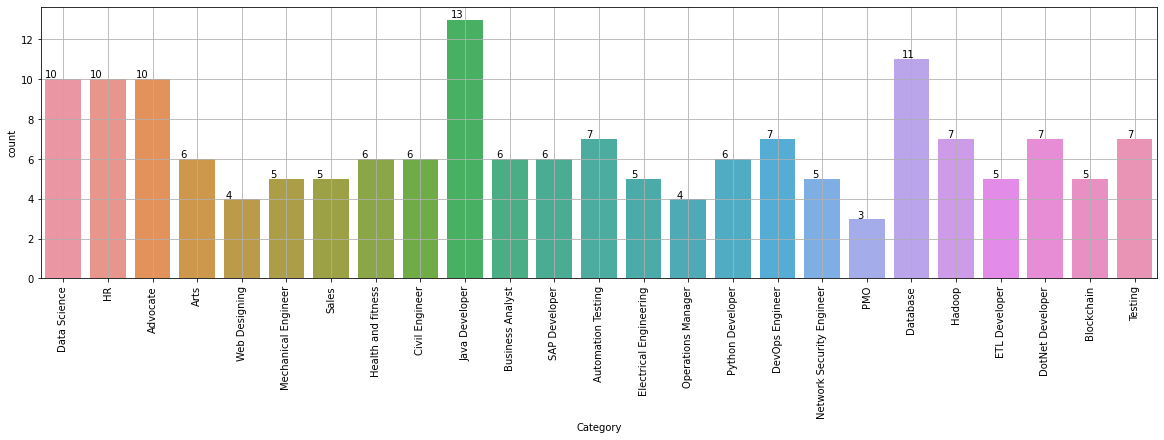

In [108]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

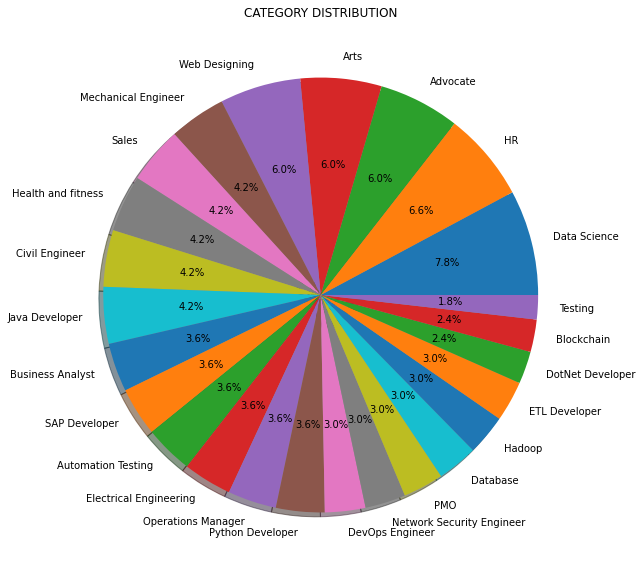

In [109]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22),facecolor='white')
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [110]:
# resumeDataset2 = resumeDataSet.drop(resumeDataSet[(resumeDataSet['Category'] != 'Java Developer') & (resumeDataSet['Category'] != 'DevOps Engineer') & (resumeDataSet['Category'] != 'Python Developer') & (resumeDataSet['Category'] != 'Web Designing') & (resumeDataSet['Category'] != 'Data Science') & (resumeDataSet['Category'] != 'ETL Developer') & (resumeDataSet['Category'] != 'Blockchain') & (resumeDataSet['Category'] != 'Database') & (resumeDataSet['Category'] != 'DotNet Developer') & (resumeDataSet['Category'] != 'Automation Testing') & (resumeDataSet['Category'] != 'Network Security Engineer')].index, inplace=True)
df = resumeDataSet.copy()

In [111]:
values = ['Java Developer','DevOps Engineer','Python Developer','Web Designing','Data Science','ETL Developer','Blockchain','Database','DotNet Developer', 'Automation Testing', 'Network Security Engineer']
# Using df.loc
resumeDataSet_Filtered  = df.loc[df['Category'].isin(values)]
resumeDataSet_Filtered

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
852,Blockchain,Hobbies â¢ Playing Chess â¢ Solving Rubik's ...,
853,Blockchain,Skills Strong CS fundamentals and problem solv...,
854,Blockchain,"KEY SKILLS: Programing languages: C, C++, Pyth...",
855,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper...",


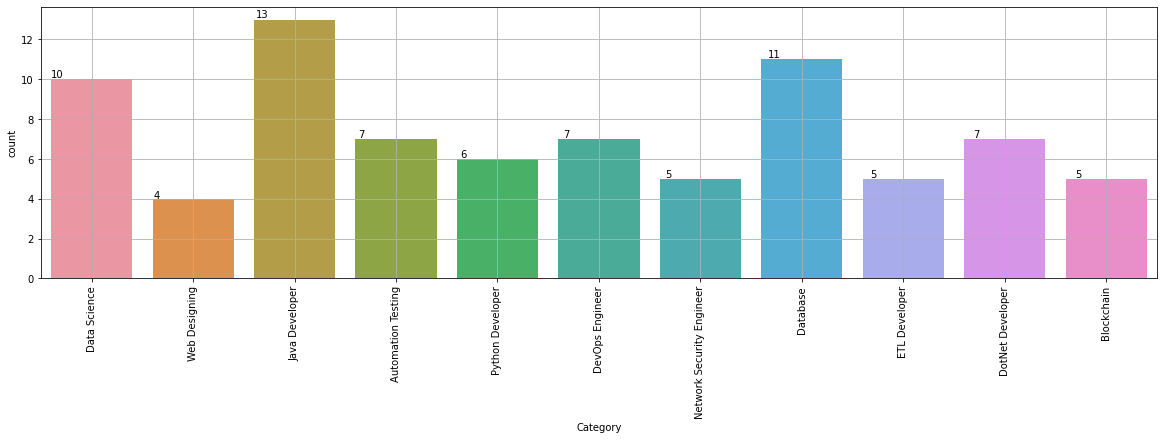

In [112]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet_Filtered)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

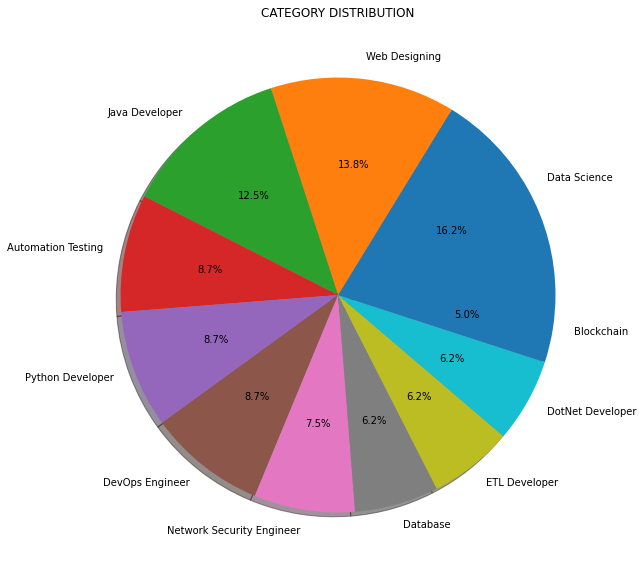

In [113]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet_Filtered['Category'].value_counts()
targetLabels  = resumeDataSet_Filtered['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22), facecolor='white')
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [114]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet_Filtered['cleaned_resume'] = resumeDataSet_Filtered.Resume.apply(lambda x: cleanResume(x))

In [115]:
resumeDataSet_Filtered.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [116]:
resumeDataSet_Filtered.to_csv('../Dataset/FilteredResumeDataSet.csv')

In [117]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet_Filtered[i] = le.fit_transform(resumeDataSet_Filtered[i])

In [118]:
resumeDataSet_Filtered.head()

,Category,Resume,cleaned_resume
0,2,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,2,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,2,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,2,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,2,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [119]:
resumeDataSet_Filtered.Category.value_counts()

7     13
3     11
2     10
5      7
4      7
0      7
9      6
8      5
6      5
1      5
10     4
Name: Category, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet_Filtered['cleaned_resume'].values
requiredTarget = resumeDataSet_Filtered['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(64, 4513)
(16, 4513)


In [121]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.89
Accuracy of KNeighbors Classifier on test set:     0.88


In [122]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          n_jobs=None):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1

   micro avg       0.88      0.88      0.88        16
   macro avg       0.75      0.82  

In [123]:
from sklearn import tree
dtclf = tree.DecisionTreeClassifier()
dtclf = dtclf.fit(X_train, y_train)
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set:     {:.2f}'.format(dtclf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set:     0.62


In [124]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()
rfclf = rfclf.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rfclf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set:     {:.2f}'.format(rfclf.score(X_test, y_test)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set:     0.62


In [125]:
from sklearn import svm
model_svm = svm.SVC()
model_svm = model_svm.fit(X_train, y_train)
print('Accuracy of SVM Classifier on training set: {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of SVM Classifier on test set:     {:.2f}'.format(model_svm.score(X_test, y_test)))

Accuracy of SVM Classifier on training set: 0.16
Accuracy of SVM Classifier on test set:     0.19


In [126]:
Test_CVs = pd.read_csv('../Dataset/Testing.csv' ,encoding='cp1252')

In [127]:
Test_CVs['cleaned_resume'] = ''
Test_CVs['cleaned_resume']= Test_CVs.Resume.apply(lambda x: cleanResume(x))

In [128]:
test_text = Test_CVs['cleaned_resume'].values
WordFeatures = word_vectorizer.transform(test_text)

In [129]:
WordFeatures.shape

(1, 4513)

In [130]:
X_test2=WordFeatures

In [131]:
y_pred2 = clf.predict(X_test2)

In [132]:
y_pred2

array([9])

In [133]:
prediction= le.inverse_transform(y_pred2)

In [134]:
prediction

array(['Python Developer'], dtype=object)